# Final Project Data Mining
#### Oleh :
###### 1. Nur Shofiatun (5003211042)
###### 2. Putri Ayu Desita (5003211051)

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Preprocessing Data

In [ ]:
data = pd.read_csv('Hotel Reservations.csv')

In [ ]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# Mengubah Data kategori dummy menjadi string untuk mempermudah visualisasi
columns_to_change = ['repeated_guest', 'required_car_parking_space']
for column in columns_to_change:
    data[column] = data[column].replace({0: 'No', 1: 'Yes'})
print(data[columns_to_change])

      repeated_guest required_car_parking_space
0                 No                         No
1                 No                         No
2                 No                         No
3                 No                         No
4                 No                         No
...              ...                        ...
36270             No                         No
36271             No                         No
36272             No                         No
36273             No                         No
36274             No                         No

[36275 rows x 2 columns]


In [ ]:
print(data['repeated_guest'].dtype)
print(data['required_car_parking_space'].dtype)

object
object


In [ ]:
# Memeriksa nilai logis pada data yang tipe nya int dan float
conditions = (data[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                    'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']] >= 0)
data = data[conditions.all(axis=1)]
print(data)

      Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan required_car_parking_space  \
0                      2       Meal Plan 1                    

**Nilai int dan float pada data telah sesuai** <br>
*jumlah kolom dan baris sesuai dengan data asli*

In [ ]:
# Memeriksa missing value pada data
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

**Data tidak memiliki missing value sehingga tidak perlu dilakukan imputasi missing value**

In [ ]:
# Memeriksa duplikat pada data
data.duplicated().sum()

0

**Tidak ada data duplikat dalam data hotel**

In [ ]:
# Menggabungkan data tanggal, bulan, dan tahun dalam satu kolom
# Mengidentifikasi baris dengan nilai hari yang tidak valid
# Mengubah nama kolom sesuai dengan yang diharapkan oleh pd.to_datetime()
data.rename(columns={'arrival_date': 'day', 'arrival_month': 'month', 'arrival_year': 'year'}, inplace=True)

# Menggabungkan kolom tanggal, bulan, dan tahun menjadi satu kolom datetime
data['arrival_datetime'] = pd.to_datetime(data[['year', 'month', 'day']], errors='coerce')

# Menampilkan baris dengan nilai yang invalid (NaT)
invalid_data = data[data['arrival_datetime'].isna()]

print("Baris dengan nilai yang invalid:")
print(invalid_data)


Baris dengan nilai yang invalid:
      Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
2626    INN02627             2               0                     1   
3677    INN03678             1               0                     1   
5600    INN05601             2               0                     1   
6343    INN06344             1               0                     1   
7648    INN07649             2               1                     1   
8000    INN08001             2               2                     1   
8989    INN08990             1               0                     1   
9153    INN09154             2               2                     1   
9245    INN09246             2               0                     1   
9664    INN09665             1               0                     1   
9934    INN09935             1               0                     1   
10593   INN10594             2               0                     1   
10652   INN10653             2 

**karena bulan 2 pada tahun 2018 hanya sampai tanggal 28, sehingga untuk data yang tanggal 29-2-2018 akan dibenarkan menjadi 28-2-2018**

In [ ]:
# Mengoreksi nilai yang tidak valid (misalnya, mengatur hari menjadi 1 jika tidak valid)
data.loc[data['arrival_datetime'].isna(), 'arrival_date'] = 1

# Menggabungkan kembali kolom tanggal, bulan, dan tahun menjadi satu kolom datetime
data['arrival_datetime'] = pd.to_datetime(data[['year', 'month', 'day']], errors='coerce')

print("Data setelah mengoreksi nilai yang invalid:")
print(data)

Data setelah mengoreksi nilai yang invalid:
      Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan required_car_parking_space  \
0                 

In [ ]:
data = data.drop(columns="arrival_date")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            36275 non-null  object        
 1   no_of_adults                          36275 non-null  int64         
 2   no_of_children                        36275 non-null  int64         
 3   no_of_weekend_nights                  36275 non-null  int64         
 4   no_of_week_nights                     36275 non-null  int64         
 5   type_of_meal_plan                     36275 non-null  object        
 6   required_car_parking_space            36275 non-null  object        
 7   room_type_reserved                    36275 non-null  object        
 8   lead_time                             36275 non-null  int64         
 9   year                                  36275 non-null  int64         
 10

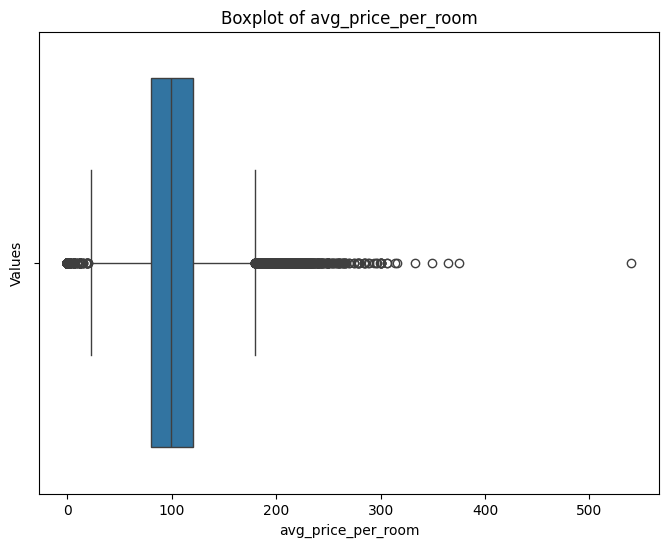

In [ ]:
# Memeriksa Outlier pada data
# Membuat boxplot untuk kolom 'avg_price_per_room'
plt.figure(figsize=(8, 6))
sns.boxplot(x='avg_price_per_room', data=data)
plt.title('Boxplot of avg_price_per_room')
plt.xlabel('avg_price_per_room')
plt.ylabel('Values')
plt.show()

In [ ]:
# Mengatasi the Outlier Data
max_value = data['avg_price_per_room'].max()
max_index = data['avg_price_per_room'].idxmax()
data = data.drop(max_index)

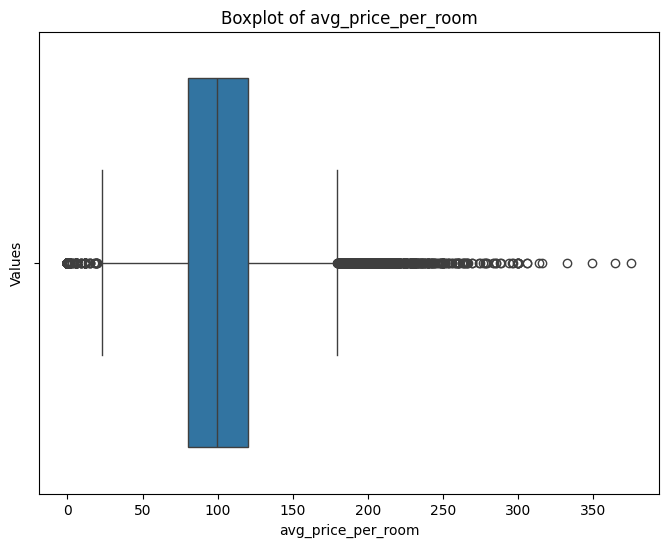

In [ ]:
# Memeriksa Outlier pada data
# Membuat boxplot untuk kolom 'avg_price_per_room'
plt.figure(figsize=(8, 6))
sns.boxplot(x='avg_price_per_room', data=data)
plt.title('Boxplot of avg_price_per_room')
plt.xlabel('avg_price_per_room')
plt.ylabel('Values')
plt.show()

In [ ]:
# Mengidentifikasi Outlier menggunakan Interquartile Range (IQR)
# Menghitung kuartil atas dan kuartil bawah
Q1 = data['avg_price_per_room'].quantile(0.25)
Q3 = data['avg_price_per_room'].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi outlier
outliers = data[(data['avg_price_per_room'] < lower_bound) | (data['avg_price_per_room'] > upper_bound)]
print("Outliers:")
outliers

Outliers:


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,year,month,day,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_datetime
60,INN00061,2,2,0,1,Meal Plan 1,Yes,Room_Type 6,2,2018,9,2,Online,No,0,0,258.00,1,Not_Canceled,2018-09-02
63,INN00064,1,0,0,1,Meal Plan 1,No,Room_Type 1,2,2017,9,10,Complementary,No,0,0,0.00,1,Not_Canceled,2017-09-10
114,INN00115,2,2,2,2,Meal Plan 1,No,Room_Type 2,116,2018,6,26,Online,No,0,0,184.24,1,Canceled,2018-06-26
127,INN00128,2,2,0,2,Meal Plan 1,No,Room_Type 6,110,2018,10,14,Online,No,0,0,190.80,0,Canceled,2018-10-14
145,INN00146,1,0,0,2,Meal Plan 1,No,Room_Type 1,13,2018,6,1,Complementary,Yes,3,5,0.00,1,Not_Canceled,2018-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36221,INN36222,2,2,2,4,Meal Plan 1,No,Room_Type 6,62,2018,9,24,Online,No,0,0,207.90,1,Not_Canceled,2018-09-24
36227,INN36228,2,2,0,1,Meal Plan 1,No,Room_Type 6,20,2018,8,6,Online,No,0,0,231.00,1,Not_Canceled,2018-08-06
36250,INN36251,1,0,0,2,Meal Plan 2,No,Room_Type 1,6,2017,12,10,Online,No,0,0,0.00,0,Not_Canceled,2017-12-10
36263,INN36264,1,0,2,1,Meal Plan 1,No,Room_Type 1,116,2018,2,28,Online,No,0,0,1.00,0,Not_Canceled,2018-02-28


In [ ]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,year,month,day,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,arrival_datetime
count,36274.000000,36274.000000,36274.000000,36274.000000,36274.000000,36274.000000,36274.000000,36274.000000,36274.000000,36274.000000,36274.000000,36274.000000,36237
mean,1.844958,0.105282,0.810746,2.204334,85.233942,2017.820422,7.423775,15.596736,0.023350,0.153416,103.411504,0.619672,2018-05-24 16:39:53.840549376
min,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2017-07-01 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,443.000000,2018.000000,12.000000,31.000000,13.000000,58.000000,375.500000,5.000000,2018-12-31 00:00:00
std,0.518721,0.402653,0.870645,1.410910,85.931596,0.383841,3.069849,8.740428,0.368337,1.754195,35.014953,0.786240,NaN


In [ ]:
# Menyimpan data dalam bentuk csv untuk membuat dashboard di RShiny
import csv
output_name = 'hotel.csv'
data.to_csv(output_name, index=False)

print(f"Cleaned data save to '{output_name}'")

Cleaned data save to 'hotel.csv'


### Feature Selection and Extraction

In [ ]:
# Spliting Data sesuai dengan jenisnya
data_numeric = data.select_dtypes(include=[np.number])
data_categorical = data.select_dtypes(exclude=[np.number])

In [ ]:
data_numeric

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,year,month,day,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,224,2017,10,2,0,0,65.00,0
1,2,0,2,3,5,2018,11,6,0,0,106.68,1
2,1,0,2,1,1,2018,2,28,0,0,60.00,0
3,2,0,0,2,211,2018,5,20,0,0,100.00,0
4,2,0,1,1,48,2018,4,11,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,85,2018,8,3,0,0,167.80,1
36271,2,0,1,3,228,2018,10,17,0,0,90.95,2
36272,2,0,2,6,148,2018,7,1,0,0,98.39,2
36273,2,0,0,3,63,2018,4,21,0,0,94.50,0


In [ ]:
data_categorical

,Booking_ID,type_of_meal_plan,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,booking_status,arrival_datetime
0,INN00001,Meal Plan 1,No,Room_Type 1,Offline,No,Not_Canceled,2017-10-02
1,INN00002,Not Selected,No,Room_Type 1,Online,No,Not_Canceled,2018-11-06
2,INN00003,Meal Plan 1,No,Room_Type 1,Online,No,Canceled,2018-02-28
3,INN00004,Meal Plan 1,No,Room_Type 1,Online,No,Canceled,2018-05-20
4,INN00005,Not Selected,No,Room_Type 1,Online,No,Canceled,2018-04-11
...,...,...,...,...,...,...,...,...
36270,INN36271,Meal Plan 1,No,Room_Type 4,Online,No,Not_Canceled,2018-08-03
36271,INN36272,Meal Plan 1,No,Room_Type 1,Online,No,Canceled,2018-10-17
36272,INN36273,Meal Plan 1,No,Room_Type 1,Online,No,Not_Canceled,2018-07-01
36273,INN36274,Not Selected,No,Room_Type 1,Online,No,Canceled,2018-04-21


#### Multikolinearitas

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Menghitung VIF untuk setiap variabel numerik
vif_data = pd.DataFrame()
vif_data["Feature"] = data_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(data_numeric.values, i) for i in range(len(data_numeric.columns))]

# Tampilkan hasil VIF
print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
                                 Feature        VIF
0                           no_of_adults  16.286273
1                         no_of_children   1.243198
2                   no_of_weekend_nights   1.956279
3                      no_of_week_nights   3.664315
4                              lead_time   2.149590
5                                   year  28.392547
6                                  month   7.144422
7                                    day   4.203974
8           no_of_previous_cancellations   1.288878
9   no_of_previous_bookings_not_canceled   1.322772
10                    avg_price_per_room  12.634177
11                no_of_special_requests   1.787906


In [ ]:
data.drop(['no_of_adults', 'year', 'avg_price_per_room', 'arrival_datetime'], axis=1, inplace=True)
data

,Booking_ID,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,month,day,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status
0,INN00001,0,1,2,Meal Plan 1,No,Room_Type 1,224,10,2,Offline,No,0,0,0,Not_Canceled
1,INN00002,0,2,3,Not Selected,No,Room_Type 1,5,11,6,Online,No,0,0,1,Not_Canceled
2,INN00003,0,2,1,Meal Plan 1,No,Room_Type 1,1,2,28,Online,No,0,0,0,Canceled
3,INN00004,0,0,2,Meal Plan 1,No,Room_Type 1,211,5,20,Online,No,0,0,0,Canceled
4,INN00005,0,1,1,Not Selected,No,Room_Type 1,48,4,11,Online,No,0,0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,0,2,6,Meal Plan 1,No,Room_Type 4,85,8,3,Online,No,0,0,1,Not_Canceled
36271,INN36272,0,1,3,Meal Plan 1,No,Room_Type 1,228,10,17,Online,No,0,0,2,Canceled
36272,INN36273,0,2,6,Meal Plan 1,No,Room_Type 1,148,7,1,Online,No,0,0,2,Not_Canceled
36273,INN36274,0,0,3,Not Selected,No,Room_Type 1,63,4,21,Online,No,0,0,0,Canceled


In [ ]:
data_numeric = data.select_dtypes(include=[np.number])

# Menghitung VIF untuk setiap variabel numerik
vif_data = pd.DataFrame()
vif_data["Feature"] = data_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(data_numeric.values, i) for i in range(len(data_numeric.columns))]

# Tampilkan hasil VIF
print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
                                Feature       VIF
0                        no_of_children  1.087379
1                  no_of_weekend_nights  1.886444
2                     no_of_week_nights  3.222375
3                             lead_time  2.076864
4                                 month  4.326982
5                                   day  3.122264
6          no_of_previous_cancellations  1.285673
7  no_of_previous_bookings_not_canceled  1.297753
8                no_of_special_requests  1.680613


#### ANOVA

In [ ]:
data_categorical = data.select_dtypes(exclude=[np.number])
data_categorical

,Booking_ID,type_of_meal_plan,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,booking_status
0,INN00001,Meal Plan 1,No,Room_Type 1,Offline,No,Not_Canceled
1,INN00002,Not Selected,No,Room_Type 1,Online,No,Not_Canceled
2,INN00003,Meal Plan 1,No,Room_Type 1,Online,No,Canceled
3,INN00004,Meal Plan 1,No,Room_Type 1,Online,No,Canceled
4,INN00005,Not Selected,No,Room_Type 1,Online,No,Canceled
...,...,...,...,...,...,...,...
36270,INN36271,Meal Plan 1,No,Room_Type 4,Online,No,Not_Canceled
36271,INN36272,Meal Plan 1,No,Room_Type 1,Online,No,Canceled
36272,INN36273,Meal Plan 1,No,Room_Type 1,Online,No,Not_Canceled
36273,INN36274,Not Selected,No,Room_Type 1,Online,No,Canceled


In [ ]:
from scipy.stats import f_oneway, pearsonr, chi2_contingency

In [ ]:
# Variabel target untuk uji ANOVA
target_variable = 'booking_status'

# Inisialisasi variabel untuk menyimpan hasil uji ANOVA yang signifikan
significant_anova = {}
threshold = 0.05  # Tingkat signifikansi

# Melakukan uji ANOVA untuk setiap variabel numerik
for col in data_numeric.columns:
    # Membuat daftar nilai dari masing-masing kelompok dalam 'booking_status'
    groups = [data_numeric[data[target_variable] == group][col].dropna() for group in data[target_variable].unique()]

    # Melakukan uji ANOVA
    f_statistic, p_value = f_oneway(*groups)

    # Menyimpan hasil uji ANOVA yang signifikan
    if p_value < threshold:
        significant_anova[col] = {
            'F-Statistic': f_statistic,
            'P-value': p_value
        }

# Menampilkan variabel yang memiliki hubungan signifikan dengan 'booking_status'
print("Variabel yang memiliki hubungan signifikan dengan 'booking_status':")
for col, result in significant_anova.items():
    print(f"{col}:")
    print(f"  F-Statistic: {result['F-Statistic']}")
    print(f"  P-value: {result['P-value']}")
    print()

Variabel yang memiliki hubungan signifikan dengan 'booking_status':
no_of_children:
  F-Statistic: 39.75736091616182
  P-value: 2.908599658830545e-10

no_of_weekend_nights:
  F-Statistic: 138.16861482485646
  P-value: 7.647786842308562e-32

no_of_week_nights:
  F-Statistic: 316.68206779981034
  P-value: 1.52746604622714e-70

lead_time:
  F-Statistic: 8638.45668016389
  P-value: 0.0

month:
  F-Statistic: 4.531680936394668
  P-value: 0.03327963874184902

day:
  F-Statistic: 4.06600958880317
  P-value: 0.04376187821675554

no_of_previous_cancellations:
  F-Statistic: 41.304943328874124
  P-value: 1.31852716470762e-10

no_of_previous_bookings_not_canceled:
  F-Statistic: 131.83110528557413
  P-value: 1.8391523657787864e-30

no_of_special_requests:
  F-Statistic: 2481.515180481009
  P-value: 0.0



#### Uji Chi-Square

In [ ]:
# Variabel target untuk uji Chi-Square
target_variable = 'booking_status'

# Inisialisasi variabel untuk menyimpan hasil uji Chi-Square yang signifikan
significant_chi2 = {}
threshold = 0.05  # Tingkat signifikansi

# Melakukan uji Chi-Square untuk setiap variabel kategorikal
for col in data_categorical.columns:
    if col != target_variable:
        contingency_table = pd.crosstab(data[target_variable], data[col])

        # Melakukan uji Chi-Square
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)

        # Menyimpan hasil uji Chi-Square yang signifikan
        if p_value < threshold:
            significant_chi2[col] = {
                'Chi-Square Statistic': chi2,
                'P-value': p_value,
                'Degrees of Freedom': dof,
                'Expected Frequencies': expected
            }

# Menampilkan variabel yang memiliki hubungan signifikan dengan 'booking_status'
print("Variabel yang memiliki hubungan signifikan dengan 'booking_status':")
for col, result in significant_chi2.items():
    print(f"{col}:")
    print(f"  Chi-Square Statistic: {result['Chi-Square Statistic']}")
    print(f"  P-value: {result['P-value']}")
    print(f"  Degrees of Freedom: {result['Degrees of Freedom']}")
    print()


Variabel yang memiliki hubungan signifikan dengan 'room_type_reserved':
type_of_meal_plan:
  Chi-Square Statistic: 278.4008024011748
  P-value: 4.697435492573845e-60
  Degrees of Freedom: 3

required_car_parking_space:
  Chi-Square Statistic: 268.35242019957406
  P-value: 2.594155991758183e-60
  Degrees of Freedom: 1

room_type_reserved:
  Chi-Square Statistic: 57.368089305540096
  P-value: 1.538815111356139e-10
  Degrees of Freedom: 6

market_segment_type:
  Chi-Square Statistic: 814.3080694142373
  P-value: 6.11045480168882e-175
  Degrees of Freedom: 4

repeated_guest:
  Chi-Square Statistic: 416.05814768002125
  P-value: 1.759732153760311e-92
  Degrees of Freedom: 1



In [ ]:
new_columns = ['booking_status', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'no_of_children','no_of_weekend_nights', 'no_of_week_nights','lead_time', 'month', 'day', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests']

In [ ]:
df = data[new_columns]
df

,booking_status,type_of_meal_plan,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,month,day,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests
0,Not_Canceled,Meal Plan 1,No,Room_Type 1,Offline,No,0,1,2,224,10,2,0,0,0
1,Not_Canceled,Not Selected,No,Room_Type 1,Online,No,0,2,3,5,11,6,0,0,1
2,Canceled,Meal Plan 1,No,Room_Type 1,Online,No,0,2,1,1,2,28,0,0,0
3,Canceled,Meal Plan 1,No,Room_Type 1,Online,No,0,0,2,211,5,20,0,0,0
4,Canceled,Not Selected,No,Room_Type 1,Online,No,0,1,1,48,4,11,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,Not_Canceled,Meal Plan 1,No,Room_Type 4,Online,No,0,2,6,85,8,3,0,0,1
36271,Canceled,Meal Plan 1,No,Room_Type 1,Online,No,0,1,3,228,10,17,0,0,2
36272,Not_Canceled,Meal Plan 1,No,Room_Type 1,Online,No,0,2,6,148,7,1,0,0,2
36273,Canceled,Not Selected,No,Room_Type 1,Online,No,0,0,3,63,4,21,0,0,0


### Oversampling

In [ ]:
from sklearn.preprocessing import LabelEncoder

data_numeric = df.select_dtypes(include=[np.number])
data_categorical = df.select_dtypes(exclude=[np.number])

label_encoders = {}
for column in data_categorical.columns:
    le = LabelEncoder()
    data_categorical[column] = le.fit_transform(data_categorical[column])
    label_encoders[column] = le

encoded_df = pd.concat([data_numeric, data_categorical], axis=1)
encoded_df

,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,month,day,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status,type_of_meal_plan,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest
0,0,1,2,224,10,2,0,0,0,1,0,0,0,3,0
1,0,2,3,5,11,6,0,0,1,1,3,0,0,4,0
2,0,2,1,1,2,28,0,0,0,0,0,0,0,4,0
3,0,0,2,211,5,20,0,0,0,0,0,0,0,4,0
4,0,1,1,48,4,11,0,0,0,0,3,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,0,2,6,85,8,3,0,0,1,1,0,0,3,4,0
36271,0,1,3,228,10,17,0,0,2,0,0,0,0,4,0
36272,0,2,6,148,7,1,0,0,2,1,0,0,0,4,0
36273,0,0,3,63,4,21,0,0,0,0,3,0,0,4,0


#### Checking Oversampling

booking_status
Not_Canceled    24390
Canceled        11884
Name: count, dtype: int64


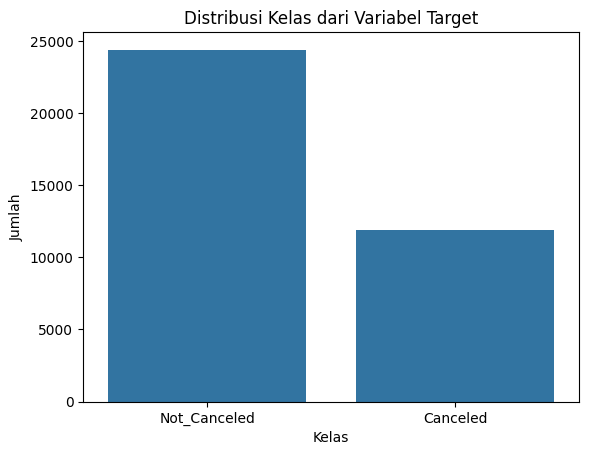

In [ ]:
import matplotlib.pyplot as plt

# Memeriksa distribusi kelas dari variabel target
class_distribution = df[target_variable].value_counts()

# Menampilkan distribusi kelas
print(class_distribution)

# Visualisasi distribusi kelas dengan bar plot
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribusi Kelas dari Variabel Target')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()


##### Metode SMOTE

booking_status
1    24390
0    24390
Name: count, dtype: int64


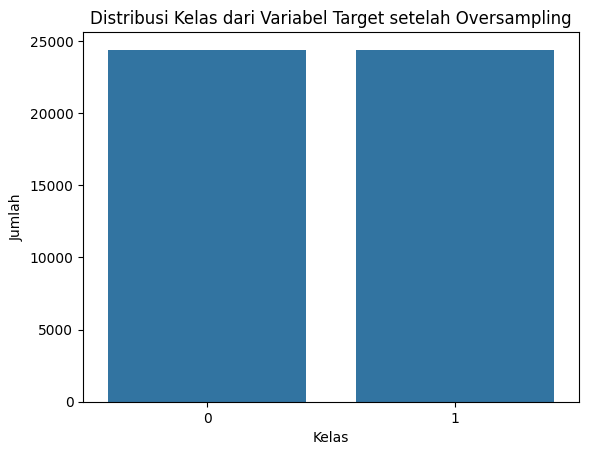

In [ ]:
from imblearn.over_sampling import SMOTE

# Memisahkan fitur dan variabel target
X = encoded_df.drop(columns=['booking_status'])
y = encoded_df['booking_status']

# Melakukan oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Memeriksa kembali distribusi kelas setelah oversampling
class_distribution_resampled = pd.Series(y_resampled).value_counts()
print(class_distribution_resampled)

# Visualisasi distribusi kelas setelah oversampling
sns.barplot(x=class_distribution_resampled.index, y=class_distribution_resampled.values)
plt.title('Distribusi Kelas dari Variabel Target setelah Oversampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()


### Classification and Training - Testing

#### Repeated holdout

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
# Inisialisasi jumlah iterasi
n_iterations = 5

In [ ]:
# Fungsi untuk menghitung spesifisitas
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

In [ ]:
# Inisialisasi list untuk menyimpan hasil akurasi, spesifisitas, sensitivitas, dan AUC
accuracy_scores_knn, accuracy_scores_rf, accuracy_scores_svm, accuracy_scores_nn = [], [], [], []
specificity_scores_knn, specificity_scores_rf, specificity_scores_svm, specificity_scores_nn = [], [], [], []
sensitivity_scores_knn, sensitivity_scores_rf, sensitivity_scores_svm, sensitivity_scores_nn = [], [], [], []
auc_scores_knn, auc_scores_rf, auc_scores_svm, auc_scores_nn = [], [], [], []

In [ ]:
# Inisialisasi model
models = {
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # Tambahkan probability=True untuk mendapatkan probabilitas
    'NeuralNetwork': MLPClassifier(max_iter=300)
}

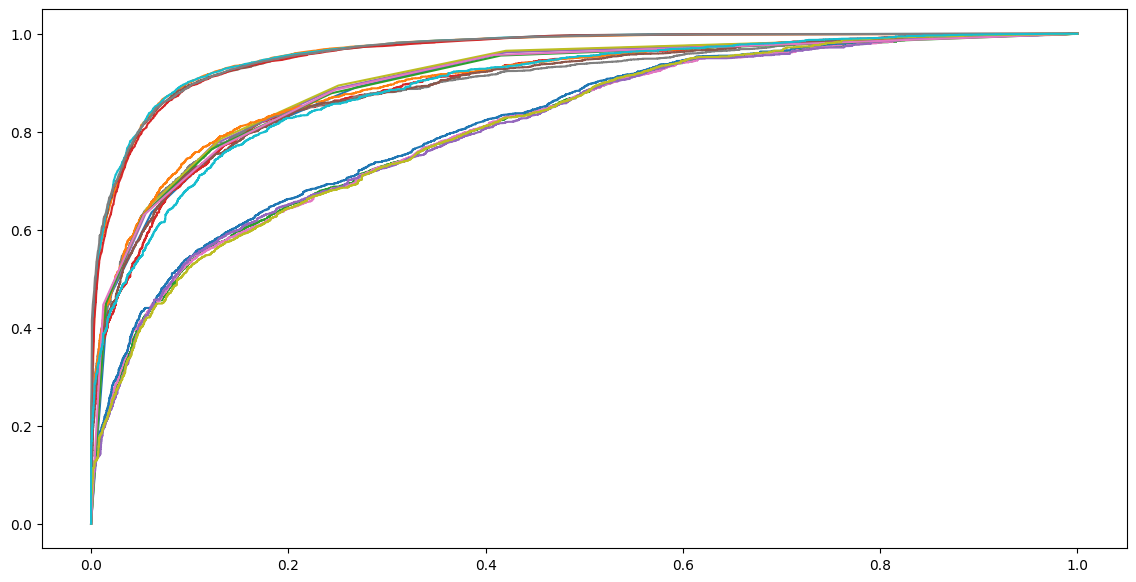

In [ ]:
# Repeated holdout
n_repeats = 5
test_size = 0.3
random_state = 42

plt.figure(figsize=(14, 7))

for i in range(n_repeats):
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=random_state + i)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif

        accuracy = accuracy_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        if model_name == 'KNN':
            accuracy_scores_knn.append(accuracy)
            specificity_scores_knn.append(specificity)
            sensitivity_scores_knn.append(sensitivity)
            auc_scores_knn.append(roc_auc)
        elif model_name == 'RandomForest':
            accuracy_scores_rf.append(accuracy)
            specificity_scores_rf.append(specificity)
            sensitivity_scores_rf.append(sensitivity)
            auc_scores_rf.append(roc_auc)
        elif model_name == 'SVM':
            accuracy_scores_svm.append(accuracy)
            specificity_scores_svm.append(specificity)
            sensitivity_scores_svm.append(sensitivity)
            auc_scores_svm.append(roc_auc)
        elif model_name == 'NeuralNetwork':
            accuracy_scores_nn.append(accuracy)
            specificity_scores_nn.append(specificity)
            sensitivity_scores_nn.append(sensitivity)
            auc_scores_nn.append(roc_auc)

        # Plot ROC curve untuk setiap model pada setiap iterasi
        plt.plot(fpr, tpr, label=f'{model_name} Iterasi {i+1} (AUC = {roc_auc:.2f})')


In [ ]:
# Print hasil rata-rata
print("Rata-rata Akurasi:")
print(f"KNN: {np.mean(accuracy_scores_knn)}")
print(f"RandomForest: {np.mean(accuracy_scores_rf)}")
print(f"SVM: {np.mean(accuracy_scores_svm)}")
print(f"NeuralNetwork: {np.mean(accuracy_scores_nn)}")

Rata-rata Akurasi:
KNN: 0.8226322263222633
RandomForest: 0.8984009840098401
SVM: 0.7114117807844746
NeuralNetwork: 0.8159081590815909


In [ ]:
print("\nRata-rata Spesifisitas:")
print(f"KNN: {np.mean(specificity_scores_knn)}")
print(f"RandomForest: {np.mean(specificity_scores_rf)}")
print(f"SVM: {np.mean(specificity_scores_svm)}")
print(f"NeuralNetwork: {np.mean(specificity_scores_nn)}")


Rata-rata Spesifisitas:
KNN: 0.8709840411131937
RandomForest: 0.903364476897813
SVM: 0.6417726023194985
NeuralNetwork: 0.8166618155239626


In [ ]:
print("\nRata-rata Sensitivitas:")
print(f"KNN: {np.mean(sensitivity_scores_knn)}")
print(f"RandomForest: {np.mean(sensitivity_scores_rf)}")
print(f"SVM: {np.mean(sensitivity_scores_svm)}")
print(f"NeuralNetwork: {np.mean(sensitivity_scores_nn)}")


Rata-rata Sensitivitas:
KNN: 0.7739839450706532
RandomForest: 0.89340731299242
SVM: 0.781522300139223
NeuralNetwork: 0.8151391910294592


In [ ]:
print("\nRata-rata AUC:")
print(f"KNN: {np.mean(auc_scores_knn)}")
print(f"RandomForest: {np.mean(auc_scores_rf)}")
print(f"SVM: {np.mean(auc_scores_svm)}")
print(f"NeuralNetwork: {np.mean(auc_scores_nn)}")


Rata-rata AUC:
KNN: 0.9033521989513524
RandomForest: 0.9629609677922965
SVM: 0.8108366071518374
NeuralNetwork: 0.8958049398040432


#### K-Fold CV

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


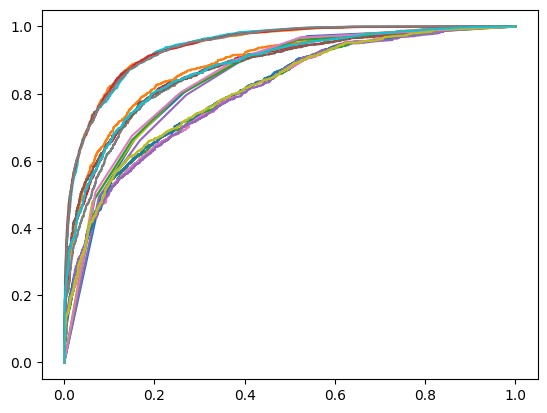

In [ ]:
# Inisialisasi K-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross-Validation
fold = 1
for train_index, test_index in kf.split(X):
    print(f'Fold {fold}')
    fold += 1

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Oversampling menggunakan SMOTE pada data training
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    for model_name, model in models.items():
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif

        accuracy = accuracy_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        if model_name == 'KNN':
            accuracy_scores_knn.append(accuracy)
            specificity_scores_knn.append(specificity)
            sensitivity_scores_knn.append(sensitivity)
            auc_scores_knn.append(roc_auc)
        elif model_name == 'RandomForest':
            accuracy_scores_rf.append(accuracy)
            specificity_scores_rf.append(specificity)
            sensitivity_scores_rf.append(sensitivity)
            auc_scores_rf.append(roc_auc)
        elif model_name == 'SVM':
            accuracy_scores_svm.append(accuracy)
            specificity_scores_svm.append(specificity)
            sensitivity_scores_svm.append(sensitivity)
            auc_scores_svm.append(roc_auc)
        elif model_name == 'NeuralNetwork':
            accuracy_scores_nn.append(accuracy)
            specificity_scores_nn.append(specificity)
            sensitivity_scores_nn.append(sensitivity)
            auc_scores_nn.append(roc_auc)

        # Plot ROC curve untuk lipatan saat ini
        plt.plot(fpr, tpr, label=f'{model_name} Fold {fold-1} (AUC = {roc_auc:.2f})')


In [ ]:
# Print hasil rata-rata
print("Rata-rata Akurasi:")
print(f"KNN: {np.mean(accuracy_scores_knn)}")
print(f"RandomForest: {np.mean(accuracy_scores_rf)}")
print(f"SVM: {np.mean(accuracy_scores_svm)}")
print(f"NeuralNetwork: {np.mean(accuracy_scores_nn)}")

Rata-rata Akurasi:
KNN: 0.8010167863988539
RandomForest: 0.8864420053732426
SVM: 0.7235176141266839
NeuralNetwork: 0.808805816180976


In [ ]:
print("\nRata-rata Spesifisitas:")
print(f"KNN: {np.mean(specificity_scores_knn)}")
print(f"RandomForest: {np.mean(specificity_scores_rf)}")
print(f"SVM: {np.mean(specificity_scores_svm)}")
print(f"NeuralNetwork: {np.mean(specificity_scores_nn)}")


Rata-rata Spesifisitas:
KNN: 0.8060847348493606
RandomForest: 0.8654758984972675
SVM: 0.6431696994757417
NeuralNetwork: 0.8024607012162204


In [ ]:
print("\nRata-rata Sensitivitas:")
print(f"KNN: {np.mean(sensitivity_scores_knn)}")
print(f"RandomForest: {np.mean(sensitivity_scores_rf)}")
print(f"SVM: {np.mean(sensitivity_scores_svm)}")
print(f"NeuralNetwork: {np.mean(sensitivity_scores_nn)}")


Rata-rata Sensitivitas:
KNN: 0.7860074033739534
RandomForest: 0.8953775427326663
SVM: 0.7807611135149065
NeuralNetwork: 0.8116382977378054


In [ ]:
print("\nRata-rata AUC:")
print(f"KNN: {np.mean(auc_scores_knn)}")
print(f"RandomForest: {np.mean(auc_scores_rf)}")
print(f"SVM: {np.mean(auc_scores_svm)}")
print(f"NeuralNetwork: {np.mean(auc_scores_nn)}")


Rata-rata AUC:
KNN: 0.8746617124260126
RandomForest: 0.9517347915344949
SVM: 0.8090343423797615
NeuralNetwork: 0.8865317530316558
